# Momento de Retroalimentación: Módulo 2 Implementación de un modelo de deep learning. (Portafolio Implementación)

Alumno: Eduardo Joel Cortez Valente

Matricula: A01746664

Materia: Inteligencia artificial avanzada para la ciencia de datos II

Clave de la materia: TC3007C

Data set utilizado: https://www.cs.toronto.edu/~kriz/cifar.html

## Conjunto de datos utilizados
El conjunto de datos utilizados fue el CIFAR-10, el cual consta de 60000 imágenes a color de 32x32 píxeles distribuidas en 10 clases, con 6000 imágenes por clase. Hay 50000 imágenes de entrenamiento y 10000 imágenes de prueba.

El conjunto de datos se divide en cinco lotes de entrenamiento y un lote de prueba, cada uno con 10000 imágenes. El lote de prueba contiene exactamente 1000 imágenes seleccionadas al azar de cada clase. Los lotes de entrenamiento contienen las imágenes restantes en un orden aleatorio, pero algunos lotes de entrenamiento pueden contener más imágenes de una clase que de otra. En conjunto, los lotes de entrenamiento contienen exactamente 5000 imágenes de cada clase.

Las clases son mutuamente excluyentes. No hay superposición entre automóviles y camiones. "Automóvil" incluye sedanes, SUVs y vehículos similares. "Camión" incluye solo camiones grandes. Ninguno de ellos incluye camionetas.

## Introducción:
El problema que se busca resolver se relaciona con la clasificación de imágenes en el conjunto de datos CIFAR-10. Cada clase representa un tipo diferente de objeto o escena, como automóviles, camiones, aviones, gatos, perros, entre otros.

La relevancia de lo que se está por hacer recide en que la clasificación de imágenes es una tarea fundamental en el área de computer visión y tiene una amplia gama de aplicaciones en la vida cotidiana. En este caso en particular, la capacidad de clasificar automáticamente objetos en imágenes es esencial para sistemas de visión artificial utilizados en aplicaciones como vehículos autónomos, sistemas de seguridad, y reconocimiento de objetos en imágenes médicas.

Por tal motivo, decidí realizar un modelo de aprendizaje profundo que hace uso de redes neuronales convolutivas para clasificar las imagenes del dataset; puesto que considero que es una buena practica para reforzar los conocimientos de algunos de los fundamentos mas esenciales en la materia.


## Datos: Análisis y preprocesamiento del dataset empleado, así como separación en conjuntos de entrenamiento y prueba.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

Se cargan los datos de CIFAR-10 y se dividen en entrenamiento y prueba (Como mencioné previamente, el dataset ya ha hecho la división previamente)

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Preproceso y exploro los datos. Primeramente convierto intensidades de los píxeles a doubles entre 0 y 1. Despues, reviso las dimensiones de mis datos.

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# Check the data has the correct shape/dimension
print(f"X Shape Training {x_train.shape}")
print(f"X Shape Test {x_test.shape}")
print(f"Y Shape Training {y_train.shape}")
print(f"Y Shape Test {y_test.shape}")

X Shape Training (50000, 32, 32, 3)
X Shape Test (10000, 32, 32, 3)
Y Shape Training (50000, 1)
Y Shape Test (10000, 1)


Grafico las primeras 10 imagenes del set de entrenamiento junto con sus nombres

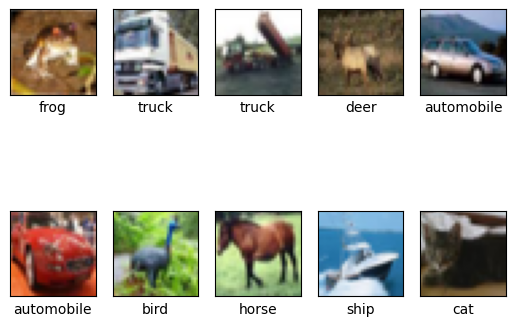

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

## Desarrollo del modelo: descripción de la arquitectura empleada, entrenamiento y evaluación de resultados.


Un modelo secuencial es apropiado para una pila simple de capas donde cada capa tiene exactamente un tensor de entrada y un tensor de salida. En este casó, me parece que la mejor opción porsible es crear un modelo secuencial apilando capas.

1. En este caso, primeramente añadiré una capa Conv2D. Es una capa de convolución que usará 32 filtros que explorarán la imagen de 3x3. La función de activación que decidí utilizar es la relu, debido a que hace que el algoritmo del gradiente descendente converja mucho más rápidamente, facilitando así el entrenamiento.

2. Posteriomente, agregué una capa MaxPooling2D, que reduce el tamaño de las caracteristicas encontradas. Especifique que tomará el valor maximo de ventana de 2x2, desplazándola por la imagen. Reduce la cantidad de datos que la red necesita procesar y ayuda a generalizar.

3. Nuevamente, repetí el proceso añadiendo la capa de Conv2D y MaxPooling con los mismos parametros.

4. Despues, apliqué una Conv2D con 64 filtros, para que aprenda caracteristicas mas sofisticadas de la imagen.

5. Una vez extraidas las caracteristicas, aplico un aplanado en la salida; convirtiendo la matriz de caracteristicas en un vector unidimensional.

6. Con el vector, soy capaz de agregar una capa densa con 1024 neuronas para aprender patrones en las caracteristicas.

7. Finalmente, aplico una capa densa con 10 neuronas (cada una representa una clase y reproduce una puntuación que indica que tanto se parece la imagen a dicha clase)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1024))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 flatten_3 (Flatten)         (None, 1024)             

Para cada ejemplo, el modelo devuelve un vector de puntuaciones "logits" o "log-odds", una para cada clase.

Paso una imagen de datos de entrenamiento al modelo y convierto las predicciones en una matriz numerosa

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.00471958, -0.05321169, -0.16667014, -0.04705847, -0.22185718,
        -0.02498092, -0.0003367 ,  0.01739806, -0.08398908,  0.03519297]],
      dtype=float32)

Ahora, convierto los logits en "Probabilidades" para cada clase haciendo uso de `tf.nn.softmax`

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.10573605, 0.09978468, 0.08908191, 0.10040057, 0.08429893,
        0.10264182, 0.10520277, 0.10708517, 0.09676035, 0.10900779]],
      dtype=float32)

Para entrenar mi red de aprendizaje profundo voy a usar el stochastic gradient descent optimization. Como parte del algoritmo de optimización, el error para el estado actual del modelo debe estimarse repetidamente (funciónción de perdida). La pérdida de losts.SparseCategoricalCrossentropy toma un vector de logits y un índice True y devuelve una pérdida escalar para cada ejemplo.

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_fn(y_train[:1], predictions).numpy()

2.2518656

Esta pérdida es igual a la probabilidad logarítmica negativa de la clase verdadera: es cero si el modelo está seguro de la clase correcta.

Una vez obtenida la perdida, paso a compilar el modelo. Uso el optimizador 'adam' por y paso la perdida que se minimizará. Primero, me gustaría entrenarlo por 10 epocas

In [ ]:
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 56s 35ms/step - loss: 1.4648 - accuracy: 0.4666 - val_loss: 1.3780 - val_accuracy: 0.5242
Epoch 2/10
1563/1563 [==============================] - 51s 32ms/step - loss: 1.1553 - accuracy: 0.5922 - val_loss: 1.1353 - val_accuracy: 0.5966
Epoch 3/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.0370 - accuracy: 0.6354 - val_loss: 1.0588 - val_accuracy: 0.6291
Epoch 4/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9644 - accuracy: 0.6581 - val_loss: 0.9845 - val_accuracy: 0.6566
Epoch 5/10
1563/1563 [==============================] - 49s 32ms/step - loss: 0.9164 - accuracy: 0.6768 - val_loss: 0.9996 - val_accuracy: 0.6578
Epoch 6/10
1563/1563 [==============================] - 49s 32ms/step - loss: 0.8760 - accuracy: 0.6930 - val_loss: 0.9532 - val_accuracy: 0.6707
Epoch 7/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8404 - accuracy: 0.7035 - val_loss: 0.9395 -

Terminado el entranamiento, evaluo como se comporta el modelo en el conjunto de prueba

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.9915 - accuracy: 0.6627 - 2s/epoch - 7ms/step

Test accuracy: 0.6626999974250793


No tiene el mejor de los desempeños, pero tampoco es tan maló. Aun así, grafico el desempeño de Accuracy entre el entremaniento vs la prueba.

313/313 - 2s - loss: 0.9915 - accuracy: 0.6627 - 2s/epoch - 7ms/step


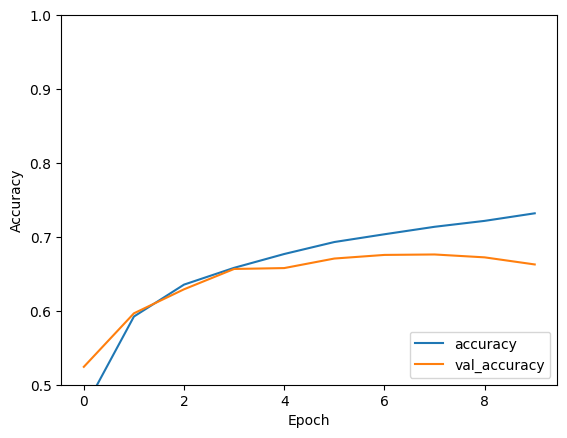

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

### Realizo predicciones:

In [ ]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test[:10]) # Pruebo con las primeras 10 imagenes
print(np.argmax(predictions, axis = 1))
print(y_test[:10])

1/1 [==============================] - 0s 90ms/step
[3 8 9 0 6 6 1 6 3 1]
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


Si comparó ambos vectores, puedo ver que hizó correctamente la clasificación de algunas imagenes, pero no de todas. Hay algunas que no clasifico como debía.

## Ajuste del modelo: ajuste de hiperparámetros/cambios en arquitectura para mejorar resultados previos.

Debido a que los resultados obtenidos aún son deficientes, por no decir malos, voy a ajustar, tanto la arquitectura de mi modelo, como los hiperparámetros del entrenamiento.

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

A la arquitectura original le hice las siguientes modificaciones
1. Dupliqué la cantidad de filtros en la segunda capa de Conv2D
2. Dupliqué nuevamente la tercerá capa de Conv2D con respecto a la anterior
3. Dupliqué la cantidad de neuronas en la capa densa para que le sea mas facil identificar caracteristicas
4. Realice un Dropout, esperando que con esta capa pueda minimizar un poco la probabilidad de overfiting del modelo

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 2048)             

Una vez modificada la arquitectura, tambien realicé algunos ajustes en los hiperparametros. Primeramente, me aseguré de especificar un learning_rate en el optimizador, aunque mantuve a Adam. Ademas, agregué un Early stoping para darme la libertad de poder agregar una mayor cantidad de epocas sin temor a que los pesos y valores de accuaracy se disparen. Le dí una paciencia de 5 teniendo en cuenta que la cantidad de epocas que ahora usaré será 15, esperando que con los ajustes hechos en la arquitectura no requiera de una mayor cantidad de estas. Mantuve la función de perdida que usé anteriormente, ya que me parece que es una operación optima para el modelo.

In [ ]:
optimizer = Adam(learning_rate=0.001)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/15
1563/1563 [==============================] - 81s 51ms/step - loss: 1.5315 - accuracy: 0.4443 - val_loss: 1.1795 - val_accuracy: 0.5737
Epoch 2/15
1563/1563 [==============================] - 77s 49ms/step - loss: 1.1619 - accuracy: 0.5904 - val_loss: 1.0301 - val_accuracy: 0.6350
Epoch 3/15
1563/1563 [==============================] - 77s 49ms/step - loss: 1.0113 - accuracy: 0.6473 - val_loss: 1.0208 - val_accuracy: 0.6413
Epoch 4/15
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9040 - accuracy: 0.6850 - val_loss: 0.8924 - val_accuracy: 0.6847
Epoch 5/15
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8241 - accuracy: 0.7110 - val_loss: 0.8815 - val_accuracy: 0.6919
Epoch 6/15
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7610 - accuracy: 0.7330 - val_loss: 0.8265 - val_accuracy: 0.7146
Epoch 7/15
1563/1563 [==============================] - 76s 49ms/step - loss: 0.7058 - accuracy: 0.7523 - val_loss: 0.8486 -

Con los ajustes hechos, recibí una mejor valoración en el val_accuracy. El cambio es mas que notable, aunque a partir de cierta epoca el accuracy para el conjunto de prueba fue decayendo lentamente.

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 4s - loss: 0.8265 - accuracy: 0.7146 - 4s/epoch - 12ms/step

Test accuracy: 0.7146000266075134


Graficando los resultados, el cambio es mas que notable contrastado con el primer modelo; aunque aún hay areas de mejora.

313/313 - 4s - loss: 0.8265 - accuracy: 0.7146 - 4s/epoch - 11ms/step


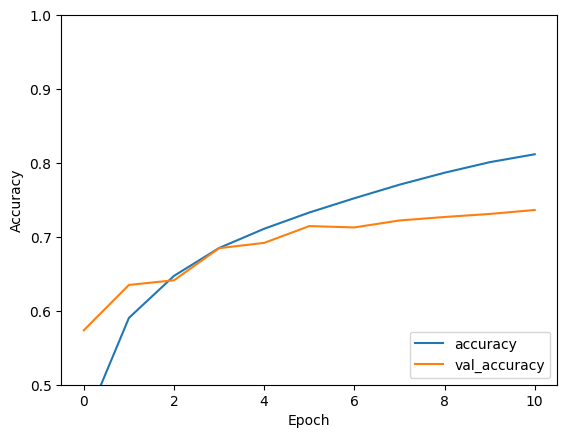

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

### Realizo predicciones:

Las predicciones sobre las primeras 10 imagenes me permiten ver que realizo correctamente la clasificación de todas las imagenes, salvo una. Por lo que considero que la mejora es mas que significativa.

In [ ]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test[:10]) # Pruebo con las primeras 10 imagenes
print(np.argmax(predictions, axis = 1))
print(y_test[:10])

1/1 [==============================] - 0s 85ms/step
[3 8 8 0 6 6 1 6 3 1]
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


## Nuevo ajuste del modelo. Cambio la arquitectura para mejorar resultados previos.

Comparando el accuracy del train (0.8567) con el de validación (0.7382) es evidente que el modelo aún está realizando overfitting. Para combatir este problema, intentaré introducir una mayor regularización (haciendo uso de capas de BatchNormalization, más capas de dropout, L1 y/o L2, etc.)


In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_8 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_8 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_9 (Bat  (None, 13, 13, 64)       

La nueva arquitectura tiene las siguientes especificaciones:

1. Conv2D (32 filtros, 3x3, ReLU): Extrae características iniciales de las imágenes.
2. Batch Normalization: Estabiliza activaciones, acelerando el entrenamiento.
3. Max Pooling (2x2): Reduce resolución espacial para eficiencia computacional.
4. Dropout (0.2): Mitiga sobreajuste apagando el 20% de neuronas.
5. Conv2D (64 filtros, 3x3, ReLU): Aprende representaciones más complejas.
6. Batch Normalization: Mejora estabilidad en la red.
7. Max Pooling (2x2): Continúa reduciendo dimensionalidad.
8. Dropout (0.3): Regula la complejidad del modelo.
9. Conv2D (128 filtros, 3x3, ReLU): Captura características más abstractas.
10. Batch Normalization: Mantiene estabilidad.
11. Max Pooling (2x2): Reduce aún más dimensiones.
12. Dropout (0.4): Evita sobreajuste.
13. Flatten: Transforma a un vector plano para capas densas.
14. Dense (256, ReLU): Neuronas totalmente conectadas para aprendizaje profundo.
15. Batch Normalization: Estabilidad adicional.
16. Dropout (0.5): Regulación final.
17. Dense (10, Softmax): Capa de salida para clasificación multiclase (CIFAR-10).

Partiendo de que se logró combatir el overfitting, ahora procederé a incrementar el número de épocas para subir el accuracy del modelo.

In [ ]:
optimizer = Adam(learning_rate=0.001)

early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/50
782/782 [==============================] - 110s 138ms/step - loss: 1.8261 - accuracy: 0.3811 - val_loss: 1.3221 - val_accuracy: 0.5202
Epoch 2/50
782/782 [==============================] - 106s 135ms/step - loss: 1.3440 - accuracy: 0.5193 - val_loss: 1.3365 - val_accuracy: 0.5366
Epoch 3/50
782/782 [==============================] - 107s 137ms/step - loss: 1.2059 - accuracy: 0.5700 - val_loss: 1.0958 - val_accuracy: 0.6149
Epoch 4/50
782/782 [==============================] - 106s 135ms/step - loss: 1.1163 - accuracy: 0.6038 - val_loss: 1.1918 - val_accuracy: 0.5839
Epoch 5/50
782/782 [==============================] - 111s 141ms/step - loss: 1.0516 - accuracy: 0.6275 - val_loss: 0.9077 - val_accuracy: 0.6833
Epoch 6/50
782/782 [==============================] - 108s 138ms/step - loss: 0.9987 - accuracy: 0.6465 - val_loss: 0.8814 - val_accuracy: 0.6921
Epoch 7/50
782/782 [==============================] - 106s 136ms/step - loss: 0.9542 - accuracy: 0.6654 - val_loss: 0.9935 -

Realizo una evaluación del desempeño de esta tercera iteración del modelo.

313/313 - 6s - loss: 0.6471 - accuracy: 0.7794 - 6s/epoch - 18ms/step


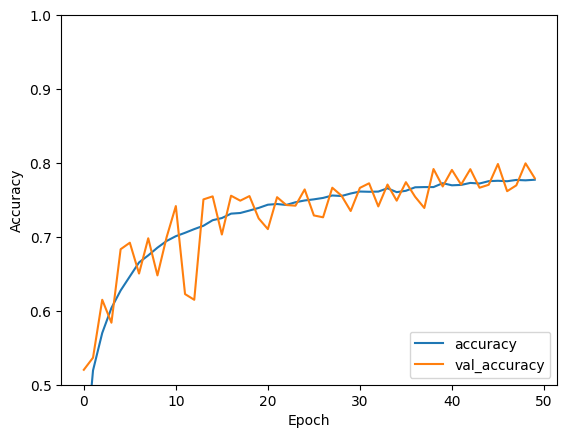

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

Me es posible vislumbrar una clara mejora en su desempeño. La precisión del conjunto de evalución aumento considerablemente y se ha constrarrestado el overfitting al atender los comentarios realizados durante la retroalimentación.

### Guardar el modelo generado

In [ ]:
model.save('image_classification_v3_final.keras')

# Carga de los modelos para realizar pruebas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Apartado para cargar mi modelo desde drive.

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/drive/MyDrive/7° - IA Avanzada/Data/image_classification_final.keras')

## Evaluación visual de los resultados del modelo

En este aparado, pariendo de la carga del modelo, se definen funciones que permiten ver visualmente los resultados de la clasificación realizada por el mismo.

1563/1563 [==============================] - 30s 19ms/step


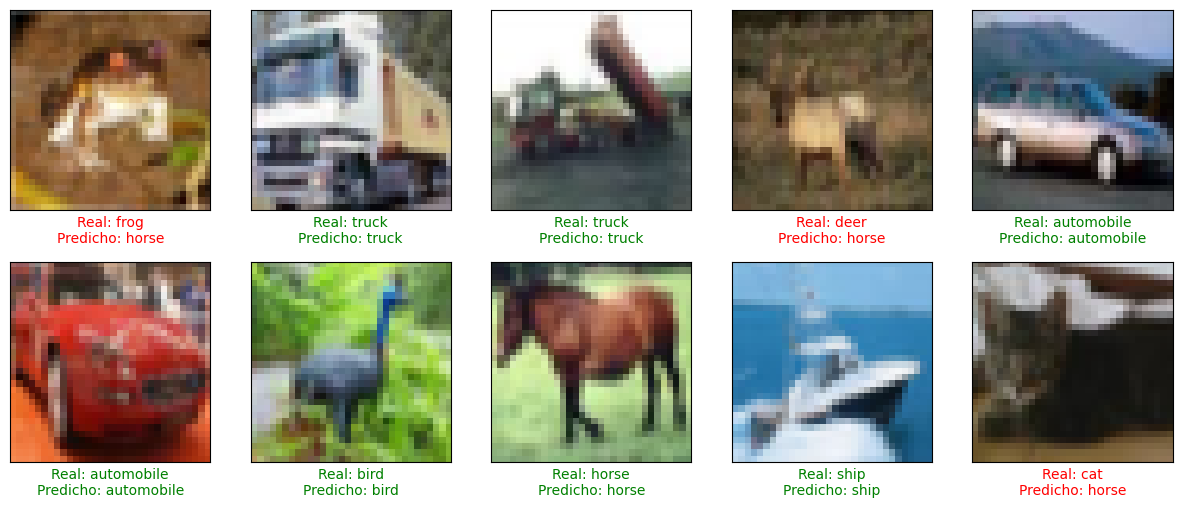

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

predictions = loaded_model.predict(x_test)

def plot_images(images, true_labels, predicted_labels, class_names):
    plt.figure(figsize=(15, 6))
    for i in range(min(10, len(images))):
        plt.subplot(2, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)

        # Label real
        true_label = class_names[true_labels[i][0]]
        # Label predicha
        predicted_label = class_names[np.argmax(predicted_labels[i])]

        title_color = 'green' if true_label == predicted_label else 'red'

        plt.xlabel(f"Real: {true_label}\nPredicho: {predicted_label}", color=title_color)

    plt.show()

plot_images(x_test, y_test, predictions, class_names)

## Realizar predicciones con nuevos datos

Este aparado es para permitir utilizar fácilmente el modelo final para realizar una predicción con un dato nuevo.

Ingrese la ruta de la imagen: /content/sample_data/frog_example.png
1/1 [==============================] - 0s 14ms/step


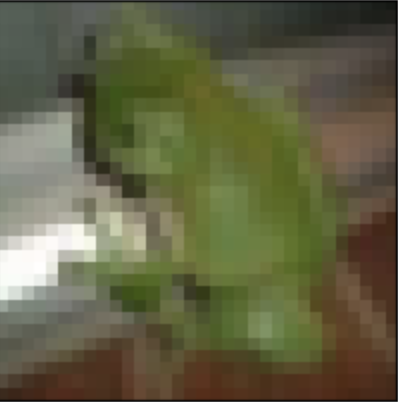

Predicción: frog
Confianza: 66.98%


In [ ]:
from IPython.display import display, Image
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

def predict_with_model(model, image_array, class_names):
    predictions = model.predict(image_array)
    predicted_label = class_names[np.argmax(predictions)]
    confidence = np.max(predictions)
    return predicted_label, confidence

# Cargar una imagen a partir de un path
image_path = input("Image path: ")
img_array = load_and_preprocess_image(image_path)

# Predicciones
predicted_label, confidence = predict_with_model(loaded_model, img_array, class_names)

img = Image(filename=image_path, width=150, height=150)
display(img)
print(f"Predicción: {predicted_label}")
print(f"Confianza: {confidence * 100:.2f}%")
